In [1]:
from simpful import *
import seaborn as sns
import csv
import json
import globals
import matplotlib


In [2]:
fuzzy_variable_template = {
    'internal_name' : "internal_name_2",
    'nice_name' : "Nice Name", 
    'universe_of_discourse' : [0.0, 50.0],
    'fuzzy_type' : 'fuzzy',
    'function_types' : {
        'foo' : 'Endpoint',
        'bar' : 'Trapezoidal',
        'nuar' : 'Trapezoidal'
    },
    'values' : {
        'foo' : [0, 0.0, 5.0, 10.0],
        'bar' : [4.0, 12.0, 20.0, 25.0],
        'nuar' : [19.0, 25.0, 50.0, 50.0]
    }
}

crisp_variable_template = {
    'internal_name' : "crispy",
    'nice_name' : "Nice Lol", 
    'universe_of_discourse' : [0, 2],
    'fuzzy_type' : 'crisp',
    'function_types' : {
        'boo' : 'Endpoint',
        'far' : 'Trapezoidal',
    },
    'values' : {
        'bar' : [0, 1],
        'foo' : [1,2],
    }
}

In [3]:
def save_fuzzy_variables(fuzzy_variables,overwrite=False):
    dumped_dict = {}
    
    if overwrite:
        for var in fuzzy_variables:
            dumped_dict[var.get('internal_name')] = var
    else:
        current_settings = load_fuzzy_variables()
        
        for var in fuzzy_variables:
            current_settings[var.get('internal_name')] = var
        dumped_dict = current_settings.copy()
    json_file = open(globals.FUZZY_VARIABLES_FILE, 'w')
    json_file.write(json.dumps(dumped_dict, indent=4))
    json_file.close()  

In [4]:
def plot_membership_function(values, type, variable_name):
    y_value = []
    if type == 'fuzzy':
        y_value = [0,1,1,0]
    elif type == 'crisp':
        y_value = [1, 1]
    else:
        return None

    fig, ax = plt.subplots()
    for value, point in values.items():
        plt.plot(point, y_value, label=value)

    ax.set_xlabel(variable_name)
    ax.set_ylabel('Membership function')
    plt.legend()
    plt.show()

In [5]:
plot_membership_function(crisp_variable_template.get('values'), 'crisp', crisp_variable_template.get('nice_name'))

NameError: name 'plt' is not defined

In [18]:
def load_fuzzy_variables():
    json_file = open(globals.FUZZY_VARIABLES_FILE, "r")
    fuzzy_variables = json.loads(json_file.read())
    json_file.close()
    return fuzzy_variables

  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.5.1 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 Created by Marco S. Nobile (m.s.nobile@tue.nl)
 and Simone Spolaor (simone.spolaor@unimib.it)



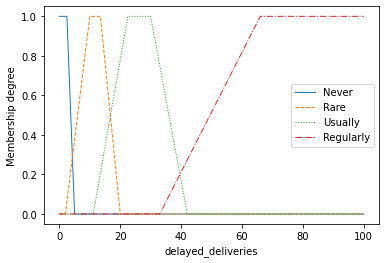

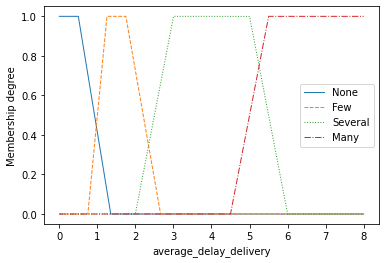

 * Detected Sugeno model type
[0.0, 0.0, 0.5151515151515151]
{'Quality': 3.0}


In [62]:
fv = load_fuzzy_variables()
var1 = fv.get('delayed_deliveries')
var2 = fv.get('average_delay_delivery')

FS_1 = FuzzySystem()
ret = fuzzify_linguistic_variable(var1)
ret2 = fuzzify_linguistic_variable(var2)
FS_1.add_linguistic_variable(ret[0], ret[1])
FS_1.add_linguistic_variable(ret2[0], ret2[1])

FS_1.plot_variable(ret[0])
FS_1.plot_variable(ret2[0])

# T_2 = FuzzySet(function=Trapezoidal_MF(a=0, b=0, c=25, d=33), term="bad")
# T_3 = FuzzySet(function=Trapezoidal_MF(a=20, b=40, c=50, d=66), term="acceptable")
# T_4 = FuzzySet(function=Trapezoidal_MF(a=55, b=80, c=100, d=100), term="best")
FS_1.set_crisp_output_value("best", 5)
FS_1.set_crisp_output_value("acceptable", 4)
FS_1.set_crisp_output_value("bad", 3)
#FS_1.add_linguistic_variable("Quality", LinguisticVariable([T_2, T_3, T_4], universe_of_discourse=[0,100]))

#FS_1.plot_variable('Quality')

R1 = "IF (((delayed_deliveries IS Rare) OR (delayed_deliveries IS Never)) AND (average_delay_delivery IS None)) THEN (Quality IS best)"
R2 = "IF (((delayed_deliveries IS Usually) OR (delayed_deliveries IS Regularly)) AND ((average_delay_delivery IS Few) OR (average_delay_delivery IS Several))) THEN (Quality IS acceptable)"
R3 = "IF ((delayed_deliveries IS Regularly) AND (average_delay_delivery IS Many)) THEN (Quality IS bad)"
FS_1.add_rules([R1, R2, R3])

FS_1.set_variable('delayed_deliveries', 50)
FS_1.set_variable("average_delay_delivery", 25)
print(FS_1.get_firing_strengths())
print(FS_1.Sugeno_inference(['Quality']))

In [6]:
def gen_init_fuzzy_values(values_names):
    result = {}
    for name in values_names:
        result[name] = [0.0, 0.0, 0.0, 0.0]
    return result

In [8]:
def gen_init_crisp_values(values_names):
    result = {}
    i = 1.0
    for name in values_names:
        result[name] = [i-1, i].copy()
        i += 1
    return result

In [2]:
def init_fuzzy_file():
    linguistic_variables = []

    with open(globals.LINGUISTIC_VALUES_FILE, newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        for row in list(reader)[1:]:
            row = list(filter(lambda item: item, row))
            new_fuzzy_var = fuzzy_variable_template.copy()
            new_fuzzy_var['internal_name'] = row[0]
            new_fuzzy_var['nice_name'] = row[1]
            if row[2] == 'fuzzy':
                new_fuzzy_var['fuzzy_type'] = 'fuzzy'
                new_fuzzy_var['values'] = gen_init_fuzzy_values(row[3:])
                new_fuzzy_var['universe_of_discourse'] = [0.0, 1.0]
            elif row[2] == 'crisp':
                new_fuzzy_var['fuzzy_type'] = 'crisp'
                new_fuzzy_var['values'] = gen_init_crisp_values(row[3:])
                new_fuzzy_var['universe_of_discourse'] = [0.0, float(len(row[3:]))]
            linguistic_variables.append(new_fuzzy_var)
            
    save_fuzzy_variables(linguistic_variables,True)

In [13]:
init_fuzzy_file()

In [103]:
save_fuzzy_variables([fuzzy_variable_template, crisp_variable_template, crasp_variable_template],True)

In [20]:
def fuzzify_linguistic_variable(fuzzy_variable):
    fz_set = []
    if fuzzy_variable.get('fuzzy_type') == 'fuzzy':
        for k, val in fuzzy_variable.get('values').items():
            fz_set.append(FuzzySet(function=Trapezoidal_MF(a=val[0], b=val[1], c=val[2], d=val[3]), term=k))
    else:
        for k, val in fuzzy_variable.get('values').items():
            fz_set.append(CrispSet(val[0], val[1], term=k))
    ling_val = LinguisticVariable(fz_set, concept=fuzzy_variable.get('nice_name'), universe_of_discourse=fuzzy_variable.get('universe_of_discourse'))
    return (fuzzy_variable.get('internal_name'), ling_val)

In [46]:
fuzzy_variable_test = {
    'internal_name' : "internal_name_2",
    'nice_name' : "Nice Name", 
    'function_type' : "Triangle",
    'values' : {
        'foo' : [0.0, 1.0, 5.0, 10.0],
        'bar' : [4.0, 12.0, 20.0, 25.0],
        'nuar' : [19.0, 25.0, 33.0, 50.0]
    }
}

In [36]:
FS_1 = FuzzySystem()
ret = fuzzify_linguistic_variable(fuzzy_variable_template)
ret2 = fuzzify_linguistic_variable(crisp_variable_template)
FS_1.add_linguistic_variable(ret[0], ret[1])
FS_1.add_linguistic_variable(ret2[0], ret2[1])

# FS_1.plot_variable(ret[0])
# FS_1.plot_variable(ret2[0])

T_1 = FuzzySet(function=Triangular_MF(a=0, b=0, c=5), term="scum")
T_2 = FuzzySet(function=Triangular_MF(a=0, b=15, c=33), term="bad")
T_3 = FuzzySet(function=Trapezoidal_MF(a=10, b=20, c=35, d=66), term="acceptable")
T_4 = FuzzySet(function=Trapezoidal_MF(a=40, b=100, c=100, d=100), term="best")
FS_1.add_linguistic_variable("Quality", LinguisticVariable([T_1, T_2, T_3, T_4], universe_of_discourse=[0,100]))

R1 = "IF (((delayed_deliveries IS Rare) OR (delayed_deliveries IS Never)) AND (average_delay_delivery IS None)) THEN (Quality IS best)"
R2 = "IF (((delayed_deliveries IS Usually) OR (delayed_deliveries IS Regularly)) AND ((average_delay_delivery IS Few) OR (average_delay_delivery IS Several))) THEN (Quality IS acceptable)"
R3 = "IF (delayed_deliveries IS Regularly) AND (average_delay_delivery IS Many) THEN (Quality IS bad)"
FS_1.add_rules([R1, R2, R3])

FS_1.set_variable('delayed_deliveries', 5)
FS_1.set_variable("average_delay_delivery", 0.75)

print(FS_1.Mamdani_inference(["Quality"]))
print(ret, ret2)

  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.5.1 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 Created by Marco S. Nobile (m.s.nobile@tue.nl)
 and Simone Spolaor (simone.spolaor@unimib.it)



Exception: ERROR: variable 'delayed_deliveries' not defined.
 ---- PROBLEMATIC CLAUSE:
c.(delayed_deliveries IS Rare)

In [2]:
linguistic_variables = []

with open('srm_linguistic_values.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',')
    for row in list(spamreader)[1:]:
        linguistic_variables[row[0]] = row[2:]
        linguistic_variables_names[row[0]] = row[1]

print (linguistic_variables)
print (linguistic_variables_names)

{'contract_price': ['Very cheap', 'Cheap', 'Medium', 'Expensive', 'Very expensive'], 'necessity ': ['Arbitrary', 'Useful', 'Necessary', 'Mandatory', 'Vital']}
{'contract_price': 'Contract price', 'necessity ': 'Necessity'}


In [20]:
FS = FuzzySystem()
ot = CrispSet (0, 1, 'One time contract')
lc = CrispSet (1, 2, 'Long contract')
FS.add_linguistic_variable("Contract type", LinguisticVariable([ot, lc], universe_of_discourse=[0,2], concept="Service quality"))

cp = FuzzySet(points=[[0., 1.], [500., 1.], [1000., 0.]], term='Cheap')
md = FuzzySet(points=[[500., 0.], [2000., 1.], [3000., 1.], [3500., 0.]], term='Medium')
exp = FuzzySet(points=[[2500., 0.],  [5000., 1.]], term='Expensive')
FS.add_linguistic_variable("Price", LinguisticVariable([cp,md,exp], concept="Service quality"))

T_1 = FuzzySet(function=Triangular_MF(a=0, b=0, c=5), term="scum")
T_2 = FuzzySet(function=Triangular_MF(a=0, b=15, c=33), term="bad")
T_3 = FuzzySet(function=Trapezoidal_MF(a=10, b=20, c=35, d=66), term="acceptable")
T_4 = FuzzySet(function=Trapezoidal_MF(a=40, b=100, c=100, d=100), term="best")
FS.add_linguistic_variable("Quality", LinguisticVariable([T_1, T_2, T_3, T_4], universe_of_discourse=[0,100]))

R1 = "IF (Price IS Cheap) AND (Contract type IS One time contract) THEN (Quality IS best)"
R2 = "IF (Contract type IS One time contract) AND ((Price IS Medium) OR (Price IS Expensive)) THEN (Quality IS acceptable)"
R3 = "IF (Contract type IS Long contract) THEN (Quality IS bad)"
FS.add_rules([R1, R2, R3])

FS.set_variable('Price', 300)
FS.set_variable("Contract_type", 1)

print(FS.Mamdani_inference(["Quality"]))

FS.plot_variable('Contract_type')

  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.5.1 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 Created by Marco S. Nobile (m.s.nobile@tue.nl)
 and Simone Spolaor (simone.spolaor@unimib.it)



Exception: ERROR: badly formatted rule, please check capitalization and syntax.
 ---- PROBLEMATIC RULE:
(Contract type IS One time contract)

  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.5.1 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 Created by Marco S. Nobile (m.s.nobile@tue.nl)
 and Simone Spolaor (simone.spolaor@unimib.it)

{'Quality': 65.6508611595726}
[1.0, 0.0, 0.0, 0.0, 0.3999999999999999, 0.6000000000000001]


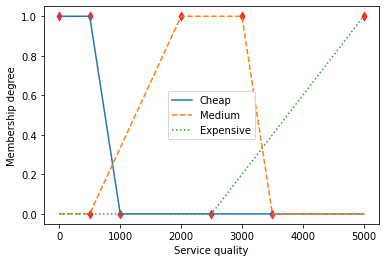

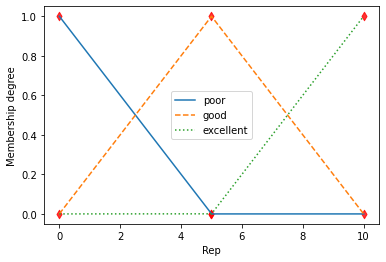

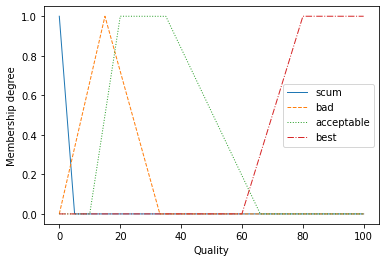

In [34]:
FS = FuzzySystem()

contract_price_set = []
cp = FuzzySet(points=[[0., 1.], [500., 1.], [1000., 0.]], term='Cheap')
md = FuzzySet(points=[[500., 0.], [2000., 1.], [3000., 1.], [3500., 0.]], term='Medium')
exp = FuzzySet(points=[[2500., 0.],  [5000., 1.]], term='Expensive')
FS.add_linguistic_variable("Price", LinguisticVariable([cp,md,exp], concept="Service quality"))


S_1 = FuzzySet(points=[[0., 1.],  [5., 0.]], term="poor")
S_2 = FuzzySet(points=[[0., 0.], [5., 1.], [10., 0.]], term="good")
S_3 = FuzzySet(points=[[5., 0.],  [10., 1.]], term="excellent")
FS.add_linguistic_variable("Reputation", LinguisticVariable([S_1, S_2, S_3], concept="Rep"))

T_1 = FuzzySet(function=Triangular_MF(a=0, b=0, c=5), term="scum")
T_2 = FuzzySet(function=Triangular_MF(a=0, b=15, c=33), term="bad")
T_3 = FuzzySet(function=Trapezoidal_MF(a=10, b=20, c=35, d=66), term="acceptable")
T_4 = FuzzySet(function=Trapezoidal_MF(a=60, b=80, c=100, d=100), term="best")
FS.add_linguistic_variable("Quality", LinguisticVariable([T_1, T_2, T_3, T_4], universe_of_discourse=[0,100]))

R1 = "IF (Price IS Cheap) AND (NOT (Reputation IS poor)) THEN (Quality IS best)"
R2 = "IF (Price IS Cheap) AND (Reputation IS poor) THEN (Quality IS bad)"
R3 = "IF (Price IS Medium) THEN (Quality IS acceptable)"
R4 = "IF (Price IS Expensive) AND (Reputation IS poor) THEN (Quality IS scum)"
R5 = "IF (Reputation IS good) THEN (Quality IS acceptable)"
R6 = "IF (((Price IS Expensive) AND (Reputation IS good)) OR (Reputation IS excellent)) THEN (Quality IS best)"
FS.add_rules([R1, R2, R3, R4, R5, R6])

FS.set_variable('Price', 300)
FS.set_variable("Reputation", 8)

print(FS.Mamdani_inference(["Quality"]))
print(FS.get_firing_strengths())

FS.plot_variable('Price')
FS.plot_variable('Reputation')
FS.plot_variable('Quality')

  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.5.1 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 Created by Marco S. Nobile (m.s.nobile@tue.nl)
 and Simone Spolaor (simone.spolaor@unimib.it)

 * Detected Sugeno model type


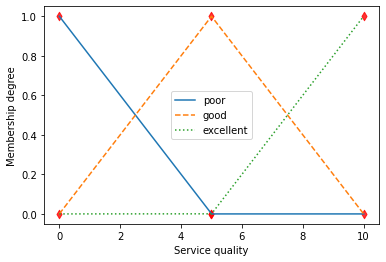

{'Tip': 22.5}


In [4]:
FS = FuzzySystem()

S_1 = FuzzySet(points=[[0., 1.],  [5., 0.]], term="poor")
S_2 = FuzzySet(points=[[0., 0.], [5., 1.], [10., 0.]], term="good")
S_3 = FuzzySet(points=[[5., 0.],  [10., 1.]], term="excellent")
FS.add_linguistic_variable("Service", LinguisticVariable([S_1, S_2, S_3], concept="Service quality"))

F_1 = FuzzySet(points=[[0., 1.],  [10., 0.]], term="rancid")
F_2 = FuzzySet(points=[[0., 0.],  [10., 1.]], term="delicious")
FS.add_linguistic_variable("Food", LinguisticVariable([F_1, F_2], concept="Food quality"))

FS.set_crisp_output_value("small", 5)
FS.set_crisp_output_value("average", 15)

FS.set_output_function("generous", "Food+Service+5")

R1 = "IF (Service IS poor) OR (Food IS rancid) THEN (Tip IS small)"
R2 = "IF (Service IS good) THEN (Tip IS average)"
R3 = "IF (Service IS excellent) OR (Food IS delicious) THEN (Tip IS generous)"
FS.add_rules([R1, R2, R3])

FS.set_variable("Service", 9)
FS.set_variable("Food", 10)

FS.plot_variable('Service')
print(FS.Sugeno_inference(["Tip"]))



  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.5.1 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 Created by Marco S. Nobile (m.s.nobile@tue.nl)
 and Simone Spolaor (simone.spolaor@unimib.it)

{'Tip': 8.946353950300269}


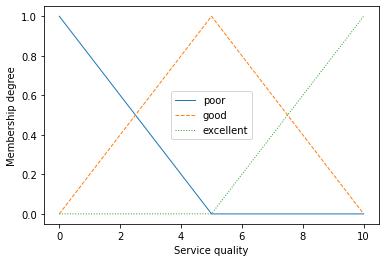

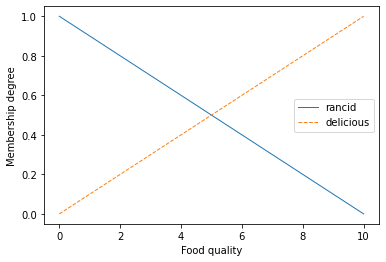

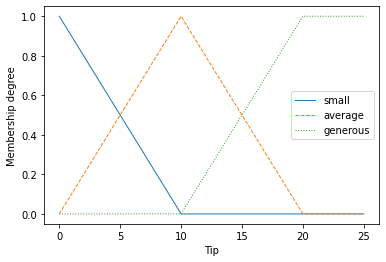

In [34]:
from simpful import *

# A simple fuzzy inference system for the tipping problem
# Create a fuzzy system object
FS = FuzzySystem()

# Define fuzzy sets and linguistic variables
S_1 = FuzzySet(function=Triangular_MF(a=0, b=0, c=5), term="poor")
S_2 = FuzzySet(function=Triangular_MF(a=0, b=5, c=10), term="good")
S_3 = FuzzySet(function=Triangular_MF(a=5, b=10, c=10), term="excellent")
FS.add_linguistic_variable("Service", LinguisticVariable([S_1, S_2, S_3], concept="Service quality", universe_of_discourse=[0,10]))

F_1 = FuzzySet(function=Triangular_MF(a=0, b=0, c=10), term="rancid")
F_2 = FuzzySet(function=Triangular_MF(a=0, b=10, c=10), term="delicious")
FS.add_linguistic_variable("Food", LinguisticVariable([F_1, F_2], concept="Food quality", universe_of_discourse=[0,10]))

# Define output fuzzy sets and linguistic variable
T_1 = FuzzySet(function=Triangular_MF(a=0, b=0, c=10), term="small")
T_2 = FuzzySet(function=Triangular_MF(a=0, b=10, c=20), term="average")
T_3 = FuzzySet(function=Trapezoidal_MF(a=10, b=20, c=25, d=25), term="generous")
FS.add_linguistic_variable("Tip", LinguisticVariable([T_1, T_2, T_3], universe_of_discourse=[0,25]))

# Define fuzzy rules
R1 = "IF (Service IS poor) OR (Food IS rancid) THEN (Tip IS small)"
R2 = "IF (Service IS good) THEN (Tip IS average)"
R3 = "IF (Service IS excellent) OR (Food IS delicious) THEN (Tip IS generous)"
FS.add_rules([R1, R2, R3])

# Set antecedents values
FS.set_variable("Service", 5)
FS.set_variable("Food", 1)

# Perform Mamdani inference and print output
print(FS.Mamdani_inference(["Tip"]))


FS.plot_variable('Service')
FS.plot_variable('Food')
FS.plot_variable('Tip')